# Using the UEA Image Labeller 
- Move desired images into `images`. No need to create any annotation files.
- Run the Flask server with `python3 flask_app.py` and go to `localhost:5000`.
- Label images as instructed by the webpage. This will create annotations.
    - __Make sure to make each segmask type "Building"!__
- Select a directory for masks and run the notebook. This will read the annotations, load and save the images with a unique number (0 thru N) for each segmask.


In [1]:
%matplotlib inline
import numpy as np
import os, math

from matplotlib import pyplot as plt

from IPython.display import display, Javascript

from image_labelling_tool import labelling_tool, labelling_tool_jupyter

/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
labelled_images = labelling_tool.PersistentLabelledImage.for_directory('images', image_filename_pattern='*.png')
print('Loaded {0} images'.format(len(labelled_images)))


Loaded 20 images


images/inpainted_3.png
segmask_inpainted_3.png


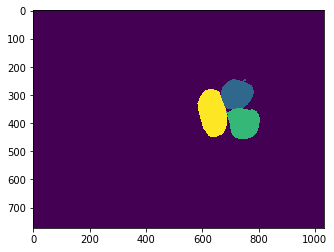

Saved mask to /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_3.png
failed to read image at images/inpainted_1_cropped.png
failed to read image at images/inpainted_7_cropped.png
failed to read image at images/inpainted_9.png
images/inpainted_2.png
segmask_inpainted_2.png


/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


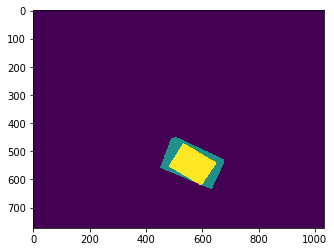

/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Saved mask to /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_2.png
failed to read image at images/inpainted_7.png
failed to read image at images/inpainted_0_cropped.png
failed to read image at images/inpainted_8.png
failed to read image at images/inpainted_5.png
failed to read image at images/inpainted_2_cropped.png
failed to read image at images/inpainted_8_cropped.png
failed to read image at images/inpainted_5_cropped.png
failed to read image at images/inpainted_3_cropped.png
images/inpainted_1.png
segmask_inpainted_1.png


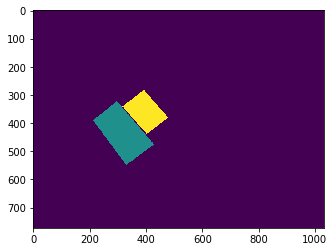

Saved mask to /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_1.png
failed to read image at images/inpainted_4_cropped.png
failed to read image at images/inpainted_6_cropped.png
failed to read image at images/inpainted_9_cropped.png
images/inpainted_0.png
segmask_inpainted_0.png


/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


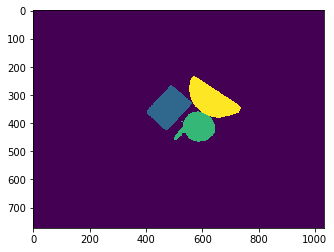

/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Saved mask to /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_0.png
images/inpainted_4.png
segmask_inpainted_4.png


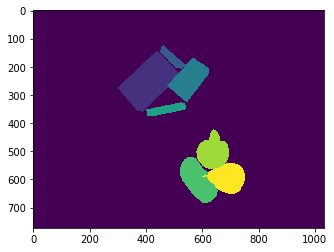

/home/andrew_lee/clutter-det/env/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Saved mask to /nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/segmask_inpainted_4.png
failed to read image at images/inpainted_6.png


In [4]:
import skimage.io

### SET ME ###
mask_dir = '/nfs/diskstation/projects/dex-net/segmentation/datasets/real_segmasks/'

for limg in labelled_images:
#     if os.path.basename(limg.image_path).lower() == 'inpainted_2.png':
    labelled_img = limg
    try:
        labels, label_count = labelled_img.render_individual_labels(label_classes=['obj'])

        print(labelled_img.image_path)
        
        filename = os.path.split(labelled_img.image_path)[1]
        
        filename = 'segmask_' + filename
        print(filename)
        plt.imshow(labels[:,:,0])
        plt.show()
        
        path = os.path.join(mask_dir, filename)
        skimage.io.imsave(path, labels[:,:,0])
        print('Saved mask to', path)
    except ValueError:
        print('failed to read image at', labelled_img.image_path)